# Plotting
## The following file comprises the plots for the various test that we run

In [44]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
#which computer is it run on? If you wish to run the following code on new machine please specify the right paths below
katarzyna = True

In [46]:

if katarzyna:
    sys.path.append("/home/katarzyna/Documents/school/applied_algo/exam/fresh_copy/TheMatrix")
    path = "/home/katarzyna/Documents/school/applied_algo/exam/fresh_copy/TheMatrix/"
else:
    sys.path.append("/home/gustavgyrst/Desktop/AA_Final/TheMatrix")
    path = "/home/gustavgyrst/Desktop/AA_Final/TheMatrix/"


### Path for saving all plots

In [47]:
plot_path = "experiments/Results/plots/"

### Define m_list for Strassen's and recursive write through

In [48]:
m_list = [0,2,4,8,16,32,64,128,256]
m_legend = ["m="+str(m) for m in m_list]

In [49]:
n_ticks = [32,64,128,256,512]
n_label = [str(tick) for tick in n_ticks]


### RUN ALL CODE ABOVE

## Recursive Write Through m-tests Plotting

### Paths and Dataframe creation 

In [50]:
#insert the relative path
relative_path = "experiments/Results/write_through_m_experiments/"


In [51]:
name = "_recursive_write_through_matrix_multiplication_mtest.csv"

recursive_write_through_res = {}

for i in range(len(m_list)):
    df_name = "df_m"+str(m_list[i])
    df = pd.read_csv(path + relative_path + str(m_list[i]) + name)
    df = df[df.index > 1]
    df['nano_seconds/runtime'] = df.apply(lambda x: (1000000000*x['time']) / x['n']**3, axis=1)
    
    recursive_write_through_res[df_name] = df

### Plotting

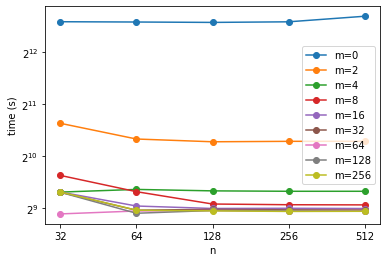

In [52]:

fig = plt.figure()
ax = fig.gca()

for m in m_list:
    name = "df_m" + str(m)
    df = recursive_write_through_res[name]
    ax.errorbar(df['n'], df['nano_seconds/runtime'], capsize = 3.0, marker = 'o')

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
plt.xticks(n_ticks, n_label)

#outside for-loop
ax.set_xlabel("n")
ax.set_ylabel("time (s)")
ax.legend(m_legend)

#save plot as pdf
plt.savefig(path+plot_path+ "recursive_write_through_m_experiment_res.pdf")


## Strassen's m-tests Plotting

### Paths and Dataframe creation 

In [53]:
#insert the relative path
relative_path = "experiments/Results/strassen_m_experiments/"

In [54]:
name = "_strassen_matrix_multiplication_mtest.csv"

strassens_res = {}

for i in range(len(m_list)):
    df_name = "df_m"+str(m_list[i])
    df = pd.read_csv(path + relative_path + str(m_list[i]) + name)
    df = df[df.index > 1]
    df['nano_seconds/runtime'] = df.apply(lambda x: (1000000000*x['time']) / x['n']**2.8, axis=1)
    
    strassens_res[df_name] = df

### Plotting

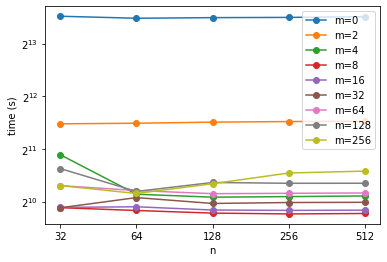

In [55]:

fig = plt.figure()
ax = fig.gca()

for m in m_list:
    name = "df_m" + str(m)
    df = strassens_res[name]
    ax.errorbar(df['n'], df['nano_seconds/runtime'], capsize = 3.0, marker = 'o')

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
plt.xticks(n_ticks, n_label)


#outside for-loop
ax.set_xlabel("n")
ax.set_ylabel("time (s)")
ax.legend(m_legend)

#save plot as pdf
plt.savefig(path+plot_path+ "strassen_m_experiment_res.pdf")



## Plotting Horse Race

In [186]:
n_ticks_horse = [2,4,8,16,32,64,128,256]
n_label_horse = [str(tick) for tick in n_ticks_horse]
computer = "GG_"

names = ["elementary_multiplication_race",
        "elementary_transposed_multiplication_race",       
        "tiled_multiplication_race",
        "recursive_copying_multiplication_race",
        "recursive_write_through_multiplication_race",
        "strassen_multiplication_race",
        ]
horse_race = [computer + name + ".csv" for name in names]

print(horse_race)

relative_path_horse_race = "experiments/horse_race/horse_race_results/"

['GG_elementary_multiplication_race.csv', 'GG_elementary_transposed_multiplication_race.csv', 'GG_tiled_multiplication_race.csv', 'GG_recursive_copying_multiplication_race.csv', 'GG_recursive_write_through_multiplication_race.csv', 'GG_strassen_multiplication_race.csv']


In [187]:
horse_race_res = {}

for i in range(len(horse_race)):
    df_name = names[i]
    df = pd.read_csv(path + relative_path_horse_race + horse_race[i])
    
    df['nano_seconds/runtime'] = df.apply(lambda x: (1000000000*x['time']) / x['n']**3.0, axis=1)
    horse_race_res[df_name] = df



In [188]:
horse_race_res["strassen_multiplication_race"]

,n,time,stdv,nano_seconds/runtime
0,2,0.000007,3.641904e-07,844.399134
1,4,0.000037,3.641904e-07,583.628813
2,8,0.000331,8.036982e-06,646.958748
3,16,0.001906,1.670243e-04,465.428457
4,32,0.012821,5.661848e-04,391.267046
5,64,0.090449,4.253191e-04,345.037430
6,128,0.611892,2.409683e-04,291.772722
7,256,4.262170,3.451533e-03,254.045148


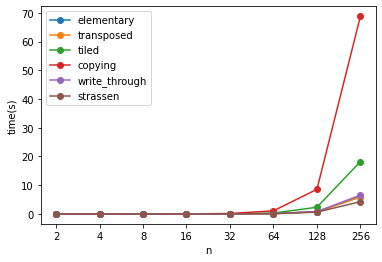

In [226]:
fig = plt.figure()
ax = fig.gca()

# #dropping tiled and copying to get better picture

#Easy representation
m_legend_horse_race = [name.split("_m")[0] for name in names]
#prettier visualization:
#m_legend_horse_race = ["elementary", "transposed", "tiled", "copying", "write_through", "strassen"]

for name in names:
    df = horse_race_res[name]
    label = name.split("_m")[0]
    if label == "elementary_transposed":
        label = label.split("_")[1]
    elif label == "recursive_copying":
        label = label.split("_")[1]
    elif label == "recursive_write_through":
        label = label.split("_")[1] + "_" + label.split("_")[2]
    ax.plot(df['n'], df['time'], label=label, marker="o")

ax.set_xscale('log', base=2)
plt.xticks(n_ticks_horse, n_label_horse)


#outside for-loop
ax.set_xlabel("n")
ax.set_ylabel("time(s)")
ax.legend()

#save plot as pdf
plt.savefig(path + plot_path + computer +"horse_race256_plain_log_y.pdf")


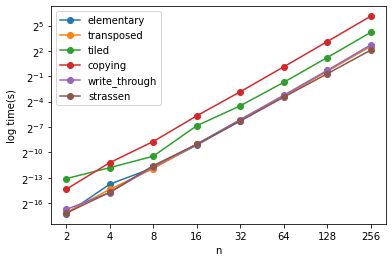

In [205]:
fig = plt.figure()
ax = fig.gca()

# #dropping tiled and copying to get better picture

#Easy representation
m_legend_horse_race = [name.split("_m")[0] for name in names]
#prettier visualization:
#m_legend_horse_race = ["elementary", "transposed", "tiled", "copying", "write_through", "strassen"]

for name in names:
    df = horse_race_res[name]
    label = name.split("_m")[0]
    if label == "elementary_transposed":
        label = label.split("_")[1]
    elif label == "recursive_copying":
        label = label.split("_")[1]
    elif label == "recursive_write_through":
        label = label.split("_")[1] + "_" + label.split("_")[2]
    ax.plot(df['n'], df['time'], label=label, marker="o")

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
plt.xticks(n_ticks_horse, n_label_horse)


#outside for-loop
ax.set_xlabel("n")
ax.set_ylabel("log time(s)")
ax.legend()

#save plot as pdf
plt.savefig(path + plot_path + computer +"horse_race256_loglog.pdf")

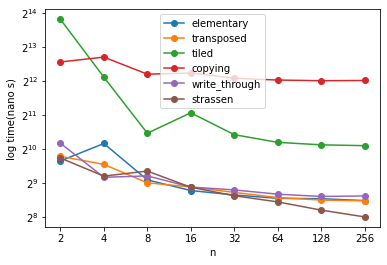

In [206]:

fig = plt.figure()
ax = fig.gca()

for name in names:
    df = horse_race_res[name]
    label = name.split("_m")[0]
    if label == "elementary_transposed":
        label = label.split("_")[1]
    elif label == "recursive_copying":
        label = label.split("_")[1]
    elif label == "recursive_write_through":
        label = label.split("_")[1] + "_" + label.split("_")[2]
    ax.plot(df['n'], df['nano_seconds/runtime'], label=label, marker="o")

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
plt.xticks(n_ticks_horse, n_label_horse)


#outside for-loop
ax.set_xlabel("n")
ax.set_ylabel("log time(nano s)")
ax.legend()

#save plot as pdf
plt.savefig(path+plot_path+ computer+"horse_race256_runtime_scaled.pdf")


## Tiled plots with fixed N = 256

In [192]:
s_ticks = [2,4,8,16,32,64,128]
n = 256

s_label = [str(tick) for tick in s_ticks]

In [193]:
tiled_path = "experiments/warmup_results/tiled_experiment/"

name = "tiled_experiment256.csv"

tiled_df = pd.read_csv(path + tiled_path +  name)

tiled_df['nano_seconds/runtime'] = tiled_df.apply(lambda x: (1000000000*x['time(s)']) / n**3, axis=1)

print(tiled_df)

     s    time(s)      stdv  nano_seconds/runtime
0    2  32.621747  0.068349           1944.407671
1    4  22.676269  0.241995           1351.610971
2    8  20.864941  0.210771           1243.647418
3   16  19.835594  0.231153           1182.293535
4   32  19.600001  0.330113           1168.251070
5   64  19.601221  0.300591           1168.323792
6  128  19.542650  0.420913           1164.832734


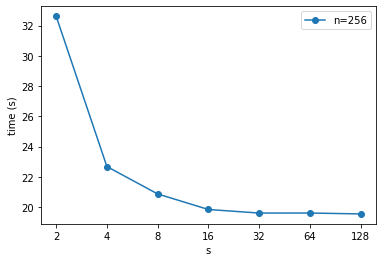

In [210]:
fig = plt.figure()
ax = fig.gca()
ax.plot(tiled_df['s'], tiled_df['time(s)'], label="n=256", marker = 'o')

ax.set_xscale('log', base=2)
plt.xticks(s_ticks, s_label)


ax.set_ylabel("time (s)")
ax.set_xlabel("s")

ax.legend()
plt.savefig(path+plot_path+ computer+"tiled_256_plain_time_x_log.pdf")

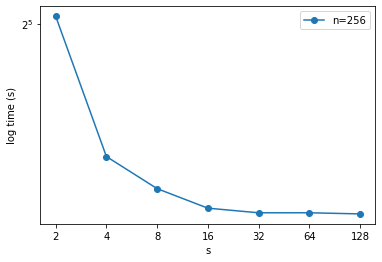

In [195]:
fig = plt.figure()
ax = fig.gca()
ax.plot(tiled_df['s'], tiled_df['time(s)'], label="n=256", marker = 'o')
ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
plt.xticks(s_ticks, s_label)


ax.set_ylabel("log time (s)")
ax.set_xlabel("s")

ax.legend()
plt.savefig(path+plot_path+ computer+"tiled_256_loglog.pdf")

[ 512. 1024. 2048. 4096.]


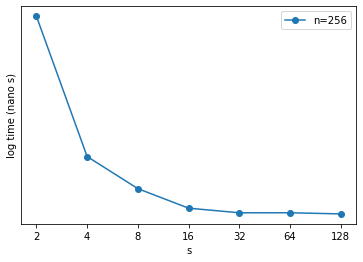

In [196]:
fig = plt.figure()
ax = fig.gca()
ax.plot(tiled_df['s'], tiled_df['nano_seconds/runtime'], label="n=256", marker = 'o')
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)
plt.xticks(s_ticks, s_label)

ax.set_ylabel("log time (nano s)")
ax.set_xlabel("s")

ax.legend()

print(ax.get_yticks())
plt.savefig(path+plot_path+ computer+"tiled_256_runtime_scaled.pdf")


## Plots for write_through with fixed n=256

In [197]:
m_ticks = [2,4,8,16,32,64,128]
n = 256

m_label = [str(tick) for tick in m_ticks]

write_through_path = "experiments/Results/write_through_m_experiments/"

name = "n256_recursive_write_through_n_fixed_mtest.csv"


write_through_df = pd.read_csv(path + write_through_path +  name)
write_through_df['nano_seconds/runtime'] = write_through_df.apply(lambda x: (1000000000*x['time(s)']) / n**3, axis=1)    

print(write_through_df)

     n    time(s)      stdv  nano_seconds/runtime
0    0  85.050945  0.570346           5069.431386
1    2  17.109285  0.128721           1019.792876
2    4   8.851750  0.067093            527.605389
3    8   7.246603  0.039321            431.931217
4   16   6.829965  0.067456            407.097649
5   32   6.673965  0.006570            397.799312
6   64   6.697631  0.042814            399.209938
7  128   6.634563  0.020842            395.450778


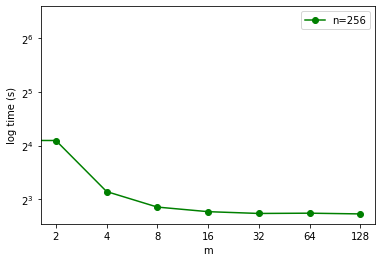

In [211]:
fig = plt.figure()
ax = fig.gca()

ax.plot(write_through_df['n'], write_through_df['time(s)'], label="n=256", marker = 'o', color="green")
ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
plt.xticks(m_ticks, m_label)

ax.set_ylabel("log time (s)")
ax.set_xlabel("m")
ax.legend()

plt.savefig(path+plot_path+computer+ "recursive_write_through_fixed_n_loglog.pdf")

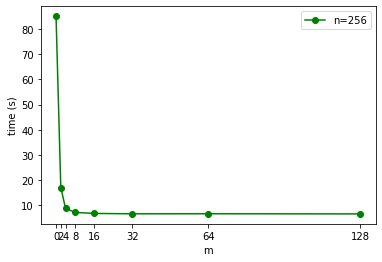

In [225]:
plain_m_ticks = [0,2,4,8,16,32,64,128]
plain_m_label = [str(tick) for tick in plain_m_ticks]

fig = plt.figure()
ax = fig.gca()

ax.plot(write_through_df['n'], write_through_df['time(s)'], label="n=256", marker = 'o', color="green")
# ax.set_xscale('log', base=2)
plt.xticks(plain_m_ticks, plain_m_label)

ax.set_ylabel("time (s)")
ax.set_xlabel("m")
ax.legend()
plt.savefig(path+plot_path+computer+ "recursive_write_through_fixed_n_plain.pdf")

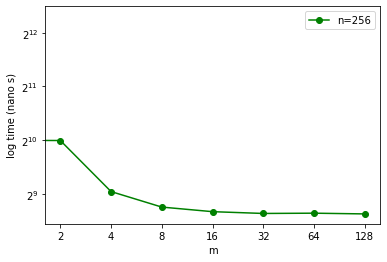

In [212]:
fig = plt.figure()
ax = fig.gca()

ax.plot(write_through_df['n'], write_through_df['nano_seconds/runtime'], label="n=256", marker = 'o', color="green")

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
plt.xticks(m_ticks, m_label)

ax.set_ylabel("log time (nano s)")
ax.set_xlabel("m")
ax.legend()

#save plot as pdf
plt.savefig(path+plot_path+computer+ "recursive_write_through_fixed_n_runtime_scaled.pdf")


## Plots for strassen with fixed n=256

In [227]:
strassen_path = "experiments/Results/strassen_m_experiments/"

name = "n256_strassen_n_fixed_mtest.csv"

strassen_df = pd.read_csv(path + strassen_path +  name)
strassen_df['nano_seconds/runtime'] = strassen_df.apply(lambda x: (1000000000*x['time(s)']) / n**2.8, axis=1)
    


print(strassen_df)

     n    time(s)      stdv  nano_seconds/runtime
0    0  50.291963  0.017154           9087.128834
1    2  12.671518  0.020420           2289.584876
2    4   4.802607  0.011825            867.771025
3    8   3.826228  0.010634            691.351636
4   16   3.862172  0.014518            697.846207
5   32   4.313387  0.019903            779.375063
6   64   4.935135  0.028239            891.717247
7  128   5.584180  0.021938           1008.991417


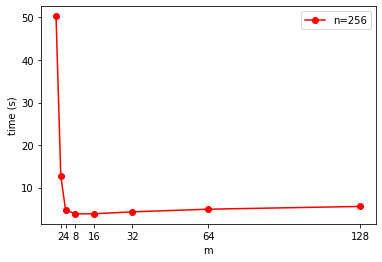

In [228]:
fig = plt.figure()
ax = fig.gca()


ax.plot(strassen_df['n'], strassen_df['time(s)'], label="n=256", marker = 'o', color="red")
ax.set_ylabel("time (s)")

ax.set_yscale('log', base=2)
plt.xticks(m_ticks, m_label)

ax.set_xlabel("m")
ax.legend()

#save plot as pdf
plt.savefig(path+plot_path+computer+ "strassen_fixed_n256_plain_log_y.pdf")

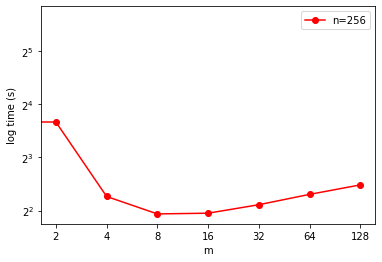

In [230]:
fig = plt.figure()
ax = fig.gca()

ax.plot(strassen_df['n'], strassen_df['time(s)'], label="n=256", marker = 'o', color="red")

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
plt.xticks(m_ticks, m_label)

ax.set_ylabel("log time (s)")
ax.set_xlabel("m")
ax.legend()

#save plot as pdf
plt.savefig(path+plot_path+computer+ "strassen_fixed_n256_loglog.pdf")

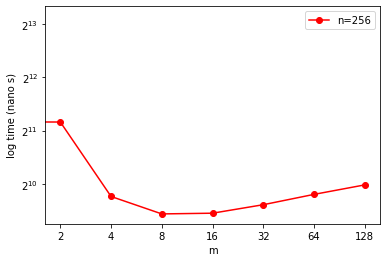

In [232]:
fig = plt.figure()
ax = fig.gca()

ax.plot(strassen_df['n'], strassen_df['nano_seconds/runtime'], label="n=256", marker = 'o', color="red")

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
plt.xticks(m_ticks, m_label)

#outside for-loop
ax.set_ylabel("log time (nano s)")
ax.set_xlabel("m")
ax.legend()

#save plot as pdf
plt.savefig(path+plot_path+computer+ "strassen_fixed_n56_runtime_scaled.pdf")